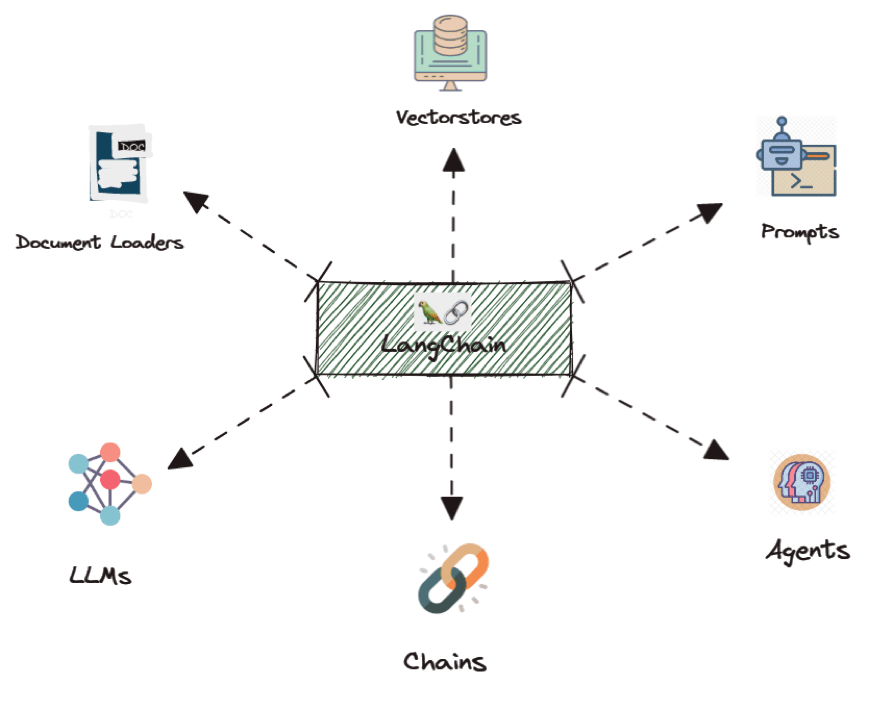

# My First LLM Chatbot

## LangChain Setup

In [ ]:
!pip install --upgrade langchain
!pip install langchain-core
!pip install langchain-community
!pip install langchain-openai

## Setting up the LLM

In [ ]:
help(ChatOpenAI)

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI

chat_model = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0, api_key = userdata.get('OPENAI_API_KEY'))

#### First Test

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="""You're an assistant knowledgeable about healthcare. Only answer healthcare-related questions."""),
    HumanMessage(content="What is ayushman bharat?"),
]

chat_model.invoke(messages) # remember, equivalent to model.predict in sklearn

In [ ]:
chat_model.invoke("What is blood pressure?")

#### Second Test

In [ ]:
messages = [
    SystemMessage(
        content="""You're an assistant knowledgeable about healthcare. Only answer healthcare-related questions."""
    ),
    HumanMessage(content="How do I change a tire?"),
]
chat_model.invoke(messages)

# ChatPromptTemplate

A `ChatPromptTemplate` is a class or utility provided by frameworks like `langchain_core` that is used to create structured templates for chat-based interactions with language models. It simplifies the process of defining, formatting, and managing prompts, especially when they involve placeholders for dynamic content.

### **Key Features of a ChatPromptTemplate**
1. **Template Structure**:
   - It uses a predefined text structure with placeholders (e.g., `{context}`, `{question}`) that can be dynamically replaced with specific input data.
   - This helps standardize how prompts are created, ensuring consistency across interactions.

2. **Dynamic Content Insertion**:
   - Placeholders in the template are substituted with actual values when the `.format()` method is called.
   - For example, `{context}` might be replaced with user input or preprocessed data.

3. **Ease of Reuse**:
   - Once defined, a `ChatPromptTemplate` can be reused multiple times with different inputs, making it efficient for workflows requiring repeated formatting.

4. **Error Handling**:
   - Ensures placeholders are properly substituted and avoids missing or malformed prompts.

5. **Integration with Language Models**:
   - Templates are often used as the initial input to language models, providing clear instructions or context for generating responses.

---

### **Components of a ChatPromptTemplate**
1. **Template String**:
   - A string containing instructions, examples, or structure, with placeholders for dynamic content.
   - Example:
     ```python
     template_str = "Use the following information to answer the question:\n\n{context}\n\nQuestion: {question}"
     ```

2. **Dynamic Placeholders**:
   - Named variables enclosed in `{}`.
   - These will be replaced with actual values at runtime using the `.format()` method.

3. **Formatting Method**:
   - `format()` dynamically replaces placeholders with provided values.
   - Example:
     ```python
     formatted_prompt = template_str.format(context="Sample context", question="What is the context about?")
     ```

### **Why Use ChatPromptTemplate?**
- **Scalability**: Handle complex prompts with multiple inputs.
- **Reusability**: Reuse templates in different parts of an application.
- **Clarity**: Keep the prompt structure organized and consistent.
- **Flexibility**: Adapt to various use cases like summarization, QA systems, or chatbot interactions.

## Chat Prompt based Instructions

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions. Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}

Question: {question}
"""

review_template = ChatPromptTemplate.from_template(instruction_str)

context = "The discharge process was seamless!"
question = "Did anyone have a positive experience?"

review_template.format(context=context, question=question)

### Additional Things to Know

1. **Structured Prompt Design**: We can create a multi-part prompt where distinct roles (system and human) are defined to interact with a language model. Each role contributes to structuring the input for clarity and context.

2. **Template-Based Customization**: We can use placeholders (`{context}`, `{question}`) to dynamically inject specific inputs into predefined templates, making the prompts flexible and reusable.

3. **Role-Specific Prompts**: The system and human prompts can be designed separately:
   - **System Message**: Sets the overarching instructions or rules for the language model's behavior.
   - **Human Message**: Provides the specific question or user input for the task.

4. **Combination of Messages**: Both the system and human prompts can be combined into a list (`messages`), creating a cohesive structure for multi-turn or contextual conversations.

5. **Dynamic Input Formatting**: The `ChatPromptTemplate` integrates the messages and formats them with actual input values (`context` and `question`), generating a well-structured prompt to guide the language model's response.

In [ ]:
from langchain.prompts import PromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate

instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

{context}
"""

review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"], template=instruction_str
    )
)

review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"], template="{question}"
    )
)

messages = [review_system_prompt, review_human_prompt]
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],
    messages=messages,
)
context = "I had a great stay!"
question = "Did anyone have a positive experience?"

review_prompt_template.format_messages(context=context, question=question)

In [ ]:
from langchain_openai import ChatOpenAI  # Interface for interacting with OpenAI's chat models
from langchain.prompts import (
    PromptTemplate,  # Template for formatting prompts with dynamic variables
    SystemMessagePromptTemplate,  # Represents a system-level instruction to the model
    HumanMessagePromptTemplate,  # Represents a human-level input for the model
    ChatPromptTemplate,  # Combines multiple prompt components into a unified chat prompt
)

# Define the system prompt template as a string with placeholders for dynamic content
review_template_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

{context}
"""

# Create a system-level message prompt template for the chatbot
review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"],  # Placeholder for the "context" (e.g., patient reviews)
        template=review_template_str,  # The instructions and structure of the system prompt
    )
)

# Create a human-level message prompt template for user input
review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"],  # Placeholder for the "question" to be answered
        template="{question}",  # A simple template where the "question" is dynamically inserted
    )
)

# Combine the system and human prompts into a list of messages
messages = [review_system_prompt, review_human_prompt]

# Create a chat prompt template that integrates the system and human prompts
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],  # Define the expected inputs for the template
    messages=messages,  # Combine the individual prompt components (system and human)
)

# Initialize the chat model with OpenAI's GPT-3.5-turbo-0125
chat_model = ChatOpenAI(
    model="gpt-3.5-turbo-0125",  # Specify the model to use
    temperature=0,  # Set the response randomness (0 means deterministic outputs)
    api_key=userdata.get('OPENAI_API_KEY'),  # Retrieve the API key securely
)

# Combine the prompt template and the chat model into a processing chain
review_chain = review_prompt_template | chat_model
# The `|` operator pipes the output of the `review_prompt_template` into the `chat_model`, creating a pipeline that formats inputs and generates responses seamlessly.

### Let's test it out!

In [ ]:
context = "I had a great stay!"
question = "Did anyone have a positive experience?"

review_chain.invoke({"context": context, "question": question})

In [ ]:
from langchain_core.output_parsers import StrOutputParser  # Parses the output of the model into a string

# Create an output parser to process the model's response into a string format
output_parser = StrOutputParser()

# Chain the review prompt template, chat model, and output parser into a unified pipeline
review_chain = review_prompt_template | chat_model | output_parser

The chaining process:
 - `review_prompt_template`: Generates a formatted prompt using the input variables (e.g., `context` and `question`).
 - `chat_model`: Sends the formatted prompt to the specified OpenAI chat model for generating a response.
 - `output_parser`: Processes the raw output from the chat model and ensures it is returned as a clean string.

 The `|` operator acts as a pipeline, automatically passing the output of one step (e.g., formatted prompt)  as the input to the next (e.g., chat model and then output parser). This simplifies the workflow for generating responses from the chat model with structured input and output handling.

In [ ]:
context = "I had a great stay!"
question = "Did anyone have a positive experience?"

review_chain.invoke({"context": context, "question": question})

# Adding RAG

In [ ]:
!pip install -U langchain-chroma

## Creation of Knowledge Base

In [ ]:
# Importing necessary modules and classes
from langchain.document_loaders.csv_loader import CSVLoader  # Loads data from a CSV file as documents
from langchain_chroma import Chroma  # A vector database for storing and retrieving embeddings
from langchain_openai import OpenAIEmbeddings  # Generates embeddings using OpenAI models

# Define file paths
REVIEWS_CSV_PATH = "/content/drive/MyDrive/GFG/99. My First LLM-based Chatbot - RAG/reviews.csv"
# Path to the CSV file containing reviews

REVIEWS_CHROMA_PATH = "chroma_data"
# Path to store the Chroma vector database data

# Load the reviews from the CSV file
loader = CSVLoader(file_path=REVIEWS_CSV_PATH, source_column="review")
# CSVLoader loads data from a CSV file.
# `source_column="review"` specifies that the column named "review" contains the text to be loaded.

reviews = loader.load()
# Loads the reviews as a list of documents, each document containing the text from the "review" column.
print(reviews)

# Create a Chroma vector database from the reviews
reviews_vector_db = Chroma.from_documents(
    reviews,  # The list of documents (reviews) to be embedded and stored
    OpenAIEmbeddings(api_key=userdata.get('OPENAI_API_KEY')),  # Use OpenAI's API to generate embeddings for the reviews
    persist_directory=REVIEWS_CHROMA_PATH,  # Directory where the Chroma database will be stored persistently
)
print(reviews_vector_db)
# `Chroma.from_documents` converts the reviews into vector representations using OpenAI embeddings.
# These vectors are stored in the Chroma database, allowing for fast similarity searches.

Key Details:
 - OpenAI embeddings: Transform the reviews into numerical vector representations for semantic similarity searches.
 - Chroma database: Stores the vectors and provides efficient methods to search and retrieve similar documents.

## Retrieval

In [ ]:
# from langchain_chroma import Chroma
# from langchain_openai import OpenAIEmbeddings

# REVIEWS_CHROMA_PATH = "chroma_data/"


# reviews_vector_db = Chroma(
#     persist_directory=REVIEWS_CHROMA_PATH,
#     embedding_function=OpenAIEmbeddings(api_key = userdata.get('OPENAI_API_KEY')),
# )

question = """Has anyone complained about communication with the hospital staff?"""
relevant_docs = reviews_vector_db.similarity_search(question, k=3)

relevant_docs[0].page_content

In [ ]:
relevant_docs[1].page_content

In [ ]:
relevant_docs[2].page_content

# Putting it all together

In [ ]:
from langchain.prompts import (
    PromptTemplate,  # Template for formatting prompts with dynamic variables
    SystemMessagePromptTemplate,  # Represents a system-level instruction to the model
    HumanMessagePromptTemplate,  # Represents a human-level input for the model
    ChatPromptTemplate,  # Combines multiple prompt components into a unified chat prompt
)

# Define the system prompt template as a string with placeholders for dynamic content
review_template_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

{context}
"""

# Create a system-level message prompt template for the chatbot
review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"],  # Placeholder for the "context" (e.g., patient reviews)
        template=review_template_str,  # The instructions and structure of the system prompt
    )
)

# Create a human-level message prompt template for user input
review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"],  # Placeholder for the "question" to be answered
        template="{question}",  # A simple template where the "question" is dynamically inserted
    )
)

# Combine the system and human prompts into a list of messages
messages = [review_system_prompt, review_human_prompt]

# Create a chat prompt template that integrates the system and human prompts
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],  # Define the expected inputs for the template
    messages=messages,  # Combine the individual prompt components (system and human)
)

In [ ]:
# Importing required modules and classes
from langchain_openai import ChatOpenAI  # Interface for OpenAI chat models
from langchain.prompts import (
    PromptTemplate,  # Template for structuring prompts
    SystemMessagePromptTemplate,  # System-level instructions for the model
    HumanMessagePromptTemplate,  # Human input instructions for the model
    ChatPromptTemplate,  # Combines system and human prompts into a single chat prompt
)
from langchain_core.output_parsers import StrOutputParser  # Parses the model's output into a clean string
from langchain_community.vectorstores import Chroma  # Vector database for efficient similarity searches
from langchain_openai import OpenAIEmbeddings  # Converts text to embeddings using OpenAI's API
from langchain.schema.runnable import RunnablePassthrough  # Allows passing inputs through unchanged in a pipeline

# Path to the persistent Chroma vector database
REVIEWS_CHROMA_PATH = "chroma_data/"

# Load the Chroma vector database
reviews_vector_db = Chroma(
    persist_directory=REVIEWS_CHROMA_PATH,  # Directory where the database is stored
    embedding_function=OpenAIEmbeddings(api_key=userdata.get('OPENAI_API_KEY'))
    # Embedding function to encode text into vectors using OpenAI embeddings
)

# Create a retriever to fetch the top 10 most relevant reviews based on a query
reviews_retriever = reviews_vector_db.as_retriever(k=10)
# - The `as_retriever` method converts the database into a retriever.
# - `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the OpenAI chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

Explanation of the pipeline:
 - `reviews_retriever`: Retrieves the relevant reviews based on the query.
 - `RunnablePassthrough`: Passes the user's question as-is, unchanged.
 - `review_prompt_template`: Combines the retrieved reviews (`context`) and the question to create a formatted prompt.
 - `chat_model`: Generates a response from the OpenAI model based on the prompt.
 - `StrOutputParser`: Cleans the response and outputs it as a plain string.

In [ ]:
question = """Has anyone complained about communication with the hospital staff?"""
review_chain.invoke(question)

# Integration with Gradio

In [ ]:
!pip install gradio

In [ ]:
from langchain.prompts import PromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate

instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

{context}
"""

review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"], template=instruction_str
    )
)

review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"], template="{question}"
    )
)

messages = [review_system_prompt, review_human_prompt]
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],
    messages=messages,
)

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI

chat_model = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0, api_key = userdata.get('OPENAI_API_KEY'))

In [ ]:
# Importing required modules and classes
from google.colab import userdata

from langchain_openai import ChatOpenAI  # Interface for OpenAI chat models
from langchain.prompts import (
    PromptTemplate,  # Template for structuring prompts
    SystemMessagePromptTemplate,  # System-level instructions for the model
    HumanMessagePromptTemplate,  # Human input instructions for the model
    ChatPromptTemplate,  # Combines system and human prompts into a single chat prompt
)
from langchain_core.output_parsers import StrOutputParser  # Parses the model's output into a clean string
from langchain_community.vectorstores import Chroma  # Vector database for efficient similarity searches
from langchain_openai import OpenAIEmbeddings  # Converts text to embeddings using OpenAI's API
from langchain.schema.runnable import RunnablePassthrough  # Allows passing inputs through unchanged in a pipeline

# Path to the persistent Chroma vector database
REVIEWS_CHROMA_PATH = "chroma_data/"

# Load the Chroma vector database
reviews_vector_db = Chroma(
    persist_directory=REVIEWS_CHROMA_PATH,  # Directory where the database is stored
    embedding_function=OpenAIEmbeddings(api_key=userdata.get('OPENAI_API_KEY'))
    # Embedding function to encode text into vectors using OpenAI embeddings
)

# Create a retriever to fetch the top 10 most relevant reviews based on a query
reviews_retriever = reviews_vector_db.as_retriever(k=10)
# - The `as_retriever` method converts the database into a retriever.
# - `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the OpenAI chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

In [ ]:
def respond_to_user_question(question: str, history: list) -> str:
    """
    Respond to a user's question using the review_chain.
    """
    return review_chain.invoke(question)

In [ ]:
respond_to_user_question("Has anyone complained about communication with the hospital staff?", [])

In [ ]:
import gradio as gr
# Create the Gradio ChatInterface
interface = gr.ChatInterface(fn=respond_to_user_question, title="Review Helper Bot")

# Launch the Gradio app
interface.launch(debug=True)